In [1]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riiid-test-answer-prediction/example_sample_submission.csv
/kaggle/input/riiid-test-answer-prediction/example_test.csv
/kaggle/input/riiid-test-answer-prediction/questions.csv
/kaggle/input/riiid-test-answer-prediction/train.csv
/kaggle/input/riiid-test-answer-prediction/lectures.csv
/kaggle/input/riiid-test-answer-prediction/riiideducation/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/riiid-test-answer-prediction/riiideducation/__init__.py
/kaggle/input/2020-r3id-clustering-question-tags/__results__.html
/kaggle/input/2020-r3id-clustering-question-tags/question_cmnts.csv
/kaggle/input/2020-r3id-clustering-question-tags/__resultx__.html
/kaggle/input/2020-r3id-clustering-question-tags/__notebook__.ipynb
/kaggle/input/2020-r3id-clustering-question-tags/__output__.json
/kaggle/input/2020-r3id-clustering-question-tags/custom.css
/kaggle/input/2020-r3id-clustering-question-tags/__results___files/__results___20_0.png
/kaggle/input/2020-r3id-clustering-question-tags

In [3]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import gc
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [4]:
#lectures= pd.read_csv("/kaggle/input/riiid-test-answer-prediction/lectures.csv")

In [5]:
#lectures["type_of"] =lectures["type_of"].str.replace('solving question','solving_question')

In [6]:
#lectures=pd.get_dummies(lectures,columns=["part","type_of"])

In [7]:
#lectures=lectures.rename(columns={"lecture_id":"content_id"})

In [8]:
#lectures = reduce_mem_usage(lectures)

In [9]:
questions = pd.read_csv('/kaggle/input/riiid-test-answer-prediction/questions.csv')

In [10]:
questions["tags"].fillna("1188",inplace=True)

In [11]:
cmnt=pd.read_csv('/kaggle/input/2020-r3id-clustering-question-tags/question_cmnts.csv')

In [12]:
questions["community"] = cmnt["community"]

In [13]:
del(cmnt)

In [14]:
#df =questions["tags"].str.split(expand=True)

In [15]:
#for col in df.columns :
    #df[col]=pd.to_numeric(df[col])

In [16]:
#df.fillna(0,inplace=True)

In [17]:
#kmean= KMeans(n_clusters=40)

In [18]:
#kmean.fit(df.values)

In [19]:
#questions["tag"] = kmean.labels_

In [20]:
questions=questions.rename(columns={"question_id":"content_id"})

In [21]:
questions = reduce_mem_usage(questions)

Memory usage of dataframe is 0.62 MB
Memory usage after optimization is: 0.17 MB
Decreased by 73.1%


In [22]:
data_types_dict = {
    'timestamp': 'int64',
    'user_id': 'int32', 
    'content_id': 'int16', 
    'content_type_id':'int8', 
    'task_container_id': 'int16',
    #'user_answer': 'int8',
    'answered_correctly': 'int8', 
    'prior_question_elapsed_time': 'float32', 
    'prior_question_had_explanation': 'boolean'
}
train = pd.read_csv("/kaggle/input/riiid-test-answer-prediction/train.csv",dtype=data_types_dict,\
                   na_values=str)

In [23]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 3861.63 MB
Memory usage after optimization is: 2799.68 MB
Decreased by 27.5%


In [24]:
#lectures.set_index(["content_id"],inplace=True)

In [25]:
#df_lectures = train[train["content_type_id"]==1]

In [26]:
#train_lectures = pd.concat([df_lectures.reset_index(drop=True),lectures.reindex(\
                                                                                #df_lectures["content_id"]).reset_index(drop=True)],axis=1)

In [27]:
#del(df_lectures)

In [28]:
#user_lect = train_lectures.groupby("user_id")["part_1","part_2","part_3","part_4","part_5",\
                                             #"part_6","part_7","type_of_concept","type_of_intention",\
                                             #"type_of_solving_question","type_of_starter"].sum()

In [29]:
#user_lect = reduce_mem_usage(user_lect)

In [30]:
#del(df)
#del(kmean)

In [31]:
cum =  train.groupby('user_id')['content_type_id'].agg(['cumsum','cumcount'])

In [32]:
cum["cumcount"] = cum["cumcount"] + 1

In [33]:
train["user_interaction_count"] = cum["cumcount"]

In [34]:
train["user_interation_timestamp_mean"] = train["timestamp"]/train["user_interaction_count"]

In [35]:
train["user_lecture_sum"] = cum['cumsum']

In [36]:
train["user_interaction_count"]=train["user_interaction_count"].astype("int64")
train["user_interation_timestamp_mean"]=train["user_interation_timestamp_mean"].astype("float32")
train["user_lecture_sum"] = train["user_lecture_sum"].astype("int8")

In [37]:
train["user_lecture_lv"] = train["user_lecture_sum"]/train["user_interaction_count"]
train["user_lecture_lv"] = train["user_lecture_lv"].astype("float32")

In [38]:
train["user_interation_timestamp_mean"] = train["user_interation_timestamp_mean"]/(1000*3600)

In [39]:
del(cum)

In [40]:
gc.collect()

237

In [41]:
train["prior_question_had_explanation"].replace([np.inf, -np.inf], np.nan)
train["prior_question_had_explanation"].fillna(False,inplace=True)
train["prior_question_had_explanation"]=train["prior_question_had_explanation"].astype("int8")

In [42]:
train = train[train["answered_correctly"] !=-1]

In [43]:
gc.collect()

60

In [44]:
content_explation_agg = train[["content_id","prior_question_had_explanation",\
                               "answered_correctly"]].groupby(["content_id","prior_question_had_explanation"]).\
agg({"answered_correctly":"mean"})


In [45]:
content_explation_agg.columns = ["mean_answer_prior_question"]

In [46]:
content_explation_agg["mean_answer_prior_question"]= content_explation_agg["mean_answer_prior_question"].astype("float16")

In [47]:
content_explation_agg = reduce_mem_usage(content_explation_agg)

Memory usage of dataframe is 0.23 MB
Memory usage after optimization is: 0.23 MB
Decreased by 0.0%


In [48]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 5017.64 MB
Memory usage after optimization is: 4165.59 MB
Decreased by 17.0%


In [49]:
#content_explation_agg = content_explation_agg.unstack()

In [50]:
train.loc[:,"no_attempt"] = 1

In [51]:
train.no_attempt=train.no_attempt.astype('int8')

In [52]:
train["no_attempt"]=train[["content_id","user_id","no_attempt"]].groupby(["user_id","content_id"])["no_attempt"].cumsum()

In [53]:
train["no_attempt"] = train["no_attempt"].astype("int8")

In [54]:
elapsed_time_imputer = train["prior_question_elapsed_time"].mean()
train["prior_question_elapsed_time"].fillna(elapsed_time_imputer,inplace=True)

In [55]:
train["lagtime1"] = train["timestamp"].shift()
lagtime1_mean = train["lagtime1"].mean()
train["lagtime1"].fillna(lagtime1_mean,inplace=True)
train["lagtime1"] = train["lagtime1"]/(1000*3600)
train["lagtime1"] = train["lagtime1"].astype("float32")

In [56]:
train["lagtime2"] = train["timestamp"].shift(2)
lagtime2_mean = train["lagtime2"].mean()
train["lagtime2"].fillna(lagtime2_mean,inplace=True)
train["lagtime2"] = train["lagtime2"]/(1000*3600)
train["lagtime2"] = train["lagtime2"].astype("float32")

In [57]:
train["lagtime3"] = train["timestamp"].shift(3)
lagtime3_mean = train["lagtime3"].mean()
train["lagtime3"].fillna(lagtime3_mean,inplace=True)
train["lagtime3"] = train["lagtime3"]/(1000*3600)
train["lagtime3"] = train["lagtime3"].astype("float32")

In [58]:
train["timestamp"] = train["timestamp"]/(3600*1000)
train["timestamp"] = train["timestamp"].astype("float32")

In [59]:
train["delta_prior_question_elapsed_time"] = train[["user_id","prior_question_elapsed_time"]].\
groupby("user_id")["prior_question_elapsed_time"].shift()
mean_delta_prior_question_elapsed_time = train["delta_prior_question_elapsed_time"].mean()
train["delta_prior_question_elapsed_time"].fillna(mean_delta_prior_question_elapsed_time,\
                                                  inplace=True)

In [60]:
train["delta_prior_question_elapsed_time"]=train["delta_prior_question_elapsed_time"]/(1000)

In [61]:
train["delta_prior_question_elapsed_time"] = train["delta_prior_question_elapsed_time"].astype("float32")

In [62]:
mean_prior_question_elapsed_time = train["prior_question_elapsed_time"].mean()
train["prior_question_elapsed_time"].fillna(mean_prior_question_elapsed_time,inplace=True)
train["prior_question_elapsed_time"]= train["prior_question_elapsed_time"]/1000
train["prior_question_elapsed_time"]=train["prior_question_elapsed_time"].astype("float32")

In [63]:
cum = train[["user_id","prior_question_had_explanation"]].groupby("user_id")["prior_question_had\
_explanation"].agg(["cumsum","cumcount"])

In [64]:
cum["cumcount"] = cum["cumcount"] + 1

In [65]:
train["explanation_mean"] = cum["cumsum"]/cum["cumcount"]
train["explanation_true_explanation"] = cum["cumsum"]
train["explanation_false_explanation"] = cum["cumcount"] - cum["cumsum"]

In [66]:
del(cum)

In [67]:
train["explanation_mean"] = train["explanation_mean"].astype("float32")
train["explanation_true_explanation"] = train["explanation_true_explanation"].astype("int8")
train["explanation_false_explanation"] = train["explanation_false_explanation"].astype("int8")

In [68]:
gc.collect()

20

In [69]:
task_container_id = train[["task_container_id","answered_correctly"]].groupby("task_container_id")\
["answered_correctly"].agg(["mean","count","var"])

In [70]:
train["container_mean"] = train["task_container_id"].map(task_container_id["mean"])

In [71]:
train["container_mean"] = train["container_mean"].astype("float32")

In [72]:
train["container_count"] = train["task_container_id"].map(task_container_id["count"])
train["container_var"] = train["task_container_id"].map(task_container_id["var"])


In [73]:
train["container_count"] = train["container_count"].astype("int8")

In [74]:
train["container_var"] = train["container_var"].astype("float64")

In [75]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 9755.11 MB
Memory usage after optimization is: 7956.33 MB
Decreased by 18.4%


In [76]:
gc.collect()

20

In [77]:
content_agg = train[["content_id","answered_correctly"]].groupby("content_id")["answered_correctly"].\
agg(["sum","count","var"])

In [78]:
questions["content_correctness"] = questions["content_id"].map(content_agg["sum"]/content_agg["count"])
questions["content_correctness"] = questions["content_correctness"].astype("float32")
questions["content_correctness_var"] = questions["content_id"].map(content_agg["var"])
questions["content_correctness_var"] = questions["content_correctness_var"].astype("float32")


In [79]:
questions["content_correct_count"] = questions["content_id"].map(content_agg["sum"])
questions["content_correct_count"] = questions["content_correct_count"].astype("int8")
questions["content_uncorrect_count"] = questions["content_id"].map(content_agg["count"]-content_agg["sum"])
questions["content_uncorrect_count"] = questions["content_uncorrect_count"].astype("int8")

In [80]:
del(content_agg)

In [81]:
part_agg = questions[["part","content_correctness"]].groupby("part")["content_correctness"].agg(\
                                                                                               ["mean"])

In [82]:
questions["part_correctness"] = questions["part"].map(part_agg["mean"])
questions["part_correctness"] = questions["part_correctness"].astype("float32")

In [83]:
del(part_agg)

In [84]:
tags_agg = questions[["tags","content_correctness"]].groupby("tags")["content_correctness"].agg(["mean"])

In [85]:
questions["tags_correctness"] = questions["tags"].map(tags_agg["mean"])
questions["tags_correctness"] = questions["tags_correctness"].astype("float32")

In [86]:
del(tags_agg)

In [87]:
del(questions["bundle_id"])
del(questions["correct_answer"])
del(questions["part"])
del(questions["tags"])


In [88]:
questions.set_index("content_id",inplace=True)

In [89]:
questions = reduce_mem_usage(questions)

Memory usage of dataframe is 0.35 MB
Memory usage after optimization is: 0.27 MB
Decreased by 22.2%


In [90]:
gc.collect()

293

# Train:

In [91]:
used_datas = train.sample(frac=0.3)

In [92]:
del(train)

In [93]:
l=len(used_datas)
train = used_datas.reset_index(drop=True).iloc[:int(0.66*l),:]
validation = used_datas.reset_index(drop=True).iloc[int(0.8*l):,:]

In [94]:
del(used_datas)

In [95]:
gc.collect()

100

In [96]:
train = pd.concat([train.reset_index(drop=True),questions.reindex(train["content_id"].values).\
                  reset_index(drop=True)],axis=1)

In [97]:
train["content_correctness"].fillna(0.5,inplace=True)
train["content_correctness_var"].fillna(0,inplace=True)
train["content_correct_count"].fillna(1,inplace=True)
train["content_uncorrect_count"].fillna(1,inplace=True)
train["part_correctness"].fillna(0.5,inplace=True)
train["tags_correctness"].fillna(0.5,inplace=True)

In [98]:
train = train.merge(content_explation_agg,how="left",left_on=["content_id","prior_question_had_explanation"],\
                right_index=True)

In [99]:
validation = pd.concat([validation.reset_index(drop=True),questions.reindex(validation["content_id"].\
                                                                           values).reset_index(drop=True)],axis=1)

In [100]:
validation["content_correctness"].fillna(0.5,inplace=True)
validation["content_correctness_var"].fillna(0,inplace=True)
validation["content_correct_count"].fillna(1,inplace=True)
validation["content_uncorrect_count"].fillna(1,inplace=True)
validation["part_correctness"].fillna(0.5,inplace=True)
validation["tags_correctness"].fillna(0.5,inplace=True)

In [101]:
validation = validation.merge(content_explation_agg,how="left",left_on=["content_id","prior_question_had_explanation"],\
                right_index=True)

In [102]:
features_dict = {
                 "community":"int8",
                 "timestamp":'float16',
                 "prior_question_elapsed_time":'float16',
                "prior_question_had_explanation":'int8',
                "user_interaction_count":'int16',
                "user_interation_timestamp_mean":"float16",
                "user_lecture_sum":"int16",
                "user_lecture_lv":"float64",
                "no_attempt":"int8",
                "lagtime1":"float16",
                "lagtime2":"float16",
                "lagtime3":"float16",
                "delta_prior_question_elapsed_time":"float16",
                "explanation_mean":"float16",
                "explanation_true_explanation":"int16",
                "explanation_false_explanation":"int16",
                "container_mean":"float16",
                "container_count":"int16",
                "container_var":"float16",
                "content_correctness":"float16",
                "content_correctness_var":"float16",
                "content_correct_count":"int16",
                "content_uncorrect_count":"int16",
                "part_correctness":"float16",
                "tags_correctness":"float16",
                "mean_answer_prior_question":"float16",
                "container_mean":"float32",
                "container_count":"int8",
                "container_var":"float64"
                }
categorical_columns=["community"]
target = "answered_correctly"
features = list(features_dict.keys())

In [103]:
xtr,xts,ytr,yts = train_test_split(train[features],train[target],test_size=0.1,\
                                  stratify=train[target])

In [104]:
del(train)

In [105]:
gc.collect()

140

In [106]:
d_train= lgbm.Dataset(xtr,label=ytr)
d_eval = lgbm.Dataset(xts,label=yts,reference=d_train)

In [107]:
params={"num_leaves":300,
       "max_bin":450,
       "feature_fraction":0.52,
       "bagging_fraction":0.52,
       "objective":"binary",
       "learning_rate":0.05,
       "boosting_type":"gbdt",
       "metric":"auc"
       }

In [108]:
clf=lgbm.train(params,d_train,valid_sets=[d_train,d_eval],num_boost_round=1500,\
               early_stopping_rounds=50,verbose_eval=50,categorical_feature=categorical_columns)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['community']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.737466	valid_1's auc: 0.737213
[100]	training's auc: 0.739957	valid_1's auc: 0.739406
[150]	training's auc: 0.741809	valid_1's auc: 0.740911
[200]	training's auc: 0.743108	valid_1's auc: 0.741843
[250]	training's auc: 0.743896	valid_1's auc: 0.742233
[300]	training's auc: 0.74453	valid_1's auc: 0.742516
[350]	training's auc: 0.745057	valid_1's auc: 0.742695
[400]	training's auc: 0.74552	valid_1's auc: 0.742795
[450]	training's auc: 0.746005	valid_1's auc: 0.742935
[500]	training's auc: 0.746473	valid_1's auc: 0.74304
[550]	training's auc: 0.746884	valid_1's auc: 0.743079
[600]	training's auc: 0.747305	valid_1's auc: 0.743151
[650]	training's auc: 0.747744	valid_1's auc: 0.743222
[700]	training's auc: 0.748129	valid_1's auc: 0.743282
[750]	training's auc: 0.748596	valid_1's auc: 0.743368
[800]	training's auc: 0.749038	valid_1's auc: 0.743462
[850]	training's auc: 0.749482	valid_1's auc: 0.743549
[900]	tr

# Inference

In [109]:
del(xtr)
del(xts)
del(ytr)
del(yts)

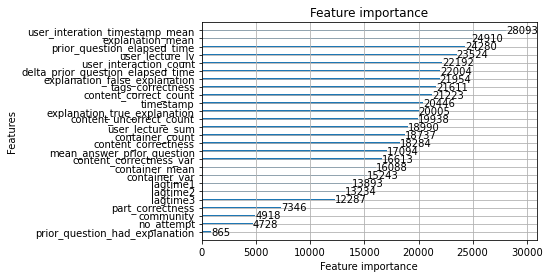

In [110]:
lgbm.plot_importance(clf)
plt.show()

# Submission

In [111]:
import time 
import riiideducation

env = riiideducation.make_env()

In [112]:
iter_test = env.iter_test()

In [113]:
for (test_df, sample_prediction_df) in iter_test:
        test_df["prior_question_had_explanation"] = test_df["prior_question_had_explanation"].fillna(False).\
astype('int8')
        cum =  test_df.groupby('user_id')['content_type_id'].agg(['cumsum','cumcount'])
        cum["cumcount"] = cum["cumcount"] + 1
        test_df["user_interaction_count"] = cum["cumcount"]
        timestamp_imputer = test_df["timestamp"].mean()
        test_df["timestamp"].fillna(timestamp_imputer,inplace=True)
        test_df["user_interation_timestamp_mean"] = test_df["timestamp"]/test_df["user_interaction_count"]
        test_df["user_lecture_sum"] = cum['cumsum']
        test_df["user_interaction_count"]=test_df["user_interaction_count"].astype("int64")
        test_df["user_interation_timestamp_mean"]=test_df["user_interation_timestamp_mean"].astype("float32")
        test_df["user_lecture_sum"] = test_df["user_lecture_sum"].astype("int8")
        test_df["user_lecture_lv"] = test_df["user_lecture_sum"]/test_df["user_interaction_count"]
        test_df["user_lecture_lv"] = test_df["user_lecture_lv"].astype("float32")
        test_df["user_interation_timestamp_mean"] = test_df["user_interation_timestamp_mean"]/(1000*3600)
        del(cum)
        test_df["prior_question_had_explanation"].replace([np.inf, -np.inf], np.nan)
        test_df["prior_question_had_explanation"].fillna(False,inplace=True)
        test_df["prior_question_had_explanation"]=test_df["prior_question_had_explanation"].astype("int8")
        test_df = test_df[test_df['content_type_id'] ==0]
        gc.collect()
        test_df.loc[:,"no_attempt"] = 1
        test_df["no_attempt"]=test_df[["content_id","user_id","no_attempt"]].groupby(["user_id","content_id"])["no_attempt"].cumsum()
        test_df["no_attempt"] = test_df["no_attempt"].astype("int8")
        test_df["lagtime1"] = test_df["timestamp"].shift()
        lagtime1_mean = test_df["lagtime1"].mean()
        test_df["lagtime1"].fillna(lagtime1_mean,inplace=True)
        test_df["lagtime1"] = test_df["lagtime1"]/(1000*3600)
        test_df["lagtime1"] = test_df["lagtime1"].astype("float32")
        test_df["lagtime2"] = test_df["timestamp"].shift(2)
        lagtime2_mean = test_df["lagtime2"].mean()
        test_df["lagtime2"].fillna(lagtime2_mean,inplace=True)
        test_df["lagtime2"] = test_df["lagtime2"]/(1000*3600)
        test_df["lagtime2"] = test_df["lagtime2"].astype("float32")
        test_df["lagtime3"] = test_df["timestamp"].shift(3)
        lagtime3_mean = test_df["lagtime3"].mean()
        test_df["lagtime3"].fillna(lagtime3_mean,inplace=True)
        test_df["lagtime3"] = test_df["lagtime3"]/(1000*3600)
        test_df["lagtime3"] = test_df["lagtime3"].astype("float32")
        test_df["timestamp"] = test_df["timestamp"]/(3600*1000)
        test_df["timestamp"] = test_df["timestamp"].astype("float32")
        test_df["delta_prior_question_elapsed_time"] = test_df[["user_id","prior_question_elapsed_time"]].\
        groupby("user_id")["prior_question_elapsed_time"].shift()
        mean_delta_prior_question_elapsed_time = test_df["delta_prior_question_elapsed_time"].mean()
        test_df["delta_prior_question_elapsed_time"].fillna(mean_delta_prior_question_elapsed_time,\
                                                  inplace=True)
        test_df["delta_prior_question_elapsed_time"]=test_df["delta_prior_question_elapsed_time"]/(1000)
        test_df["delta_prior_question_elapsed_time"] = test_df["delta_prior_question_elapsed_time"].astype("float32")
        mean_prior_question_elapsed_time = test_df["prior_question_elapsed_time"].mean()
        test_df["prior_question_elapsed_time"].fillna(mean_prior_question_elapsed_time,inplace=True)
        test_df["prior_question_elapsed_time"]= test_df["prior_question_elapsed_time"]/1000
        test_df["prior_question_elapsed_time"]=test_df["prior_question_elapsed_time"].astype("float32")
        cum = test_df[["user_id","prior_question_had_explanation"]].groupby("user_id")["prior_question_had\
_explanation"].agg(["cumsum","cumcount"])
        cum["cumcount"] = cum["cumcount"] + 1
        test_df["explanation_mean"] = cum["cumsum"]/cum["cumcount"]
        test_df["explanation_true_explanation"] = cum["cumsum"]
        test_df["explanation_false_explanation"] = cum["cumcount"] - cum["cumsum"]
        del(cum)
        test_df["explanation_mean"] = test_df["explanation_mean"].astype("float32")
        test_df["explanation_true_explanation"] = test_df["explanation_true_explanation"].astype("int8")
        test_df["explanation_false_explanation"] = test_df["explanation_false_explanation"].astype("int8")
        gc.collect()
        test_df["container_mean"] = test_df["task_container_id"].map(task_container_id["mean"])
        test_df["container_mean"] = test_df["container_mean"].astype("float32")
        test_df["container_count"] = test_df["task_container_id"].map(task_container_id["count"])
        test_df["container_var"] = test_df["task_container_id"].map(task_container_id["var"])
        test_df["container_count"] = test_df["container_count"].astype("int8")
        test_df["container_var"] = test_df["container_var"].astype("float64")
        gc.collect()
        test_df = reduce_mem_usage(test_df)
        test_df = pd.concat([test_df.reset_index(drop=True),questions.reindex(test_df["content_id"].values).\
                  reset_index(drop=True)],axis=1)
        test_df["content_correctness"].fillna(0.5,inplace=True)
        test_df["content_correctness_var"].fillna(0,inplace=True)
        test_df["content_correct_count"].fillna(1,inplace=True)
        test_df["content_uncorrect_count"].fillna(1,inplace=True)
        test_df["part_correctness"].fillna(0.5,inplace=True)
        test_df["tags_correctness"].fillna(0.5,inplace=True)
        test_df = test_df.merge(content_explation_agg,how="left",left_on=["content_id","prior_question_had_explanation"],\
                right_index=True)
        test_df["mean_answer_prior_question"].fillna(0.5,inplace=True)
        #test_df.fillna(value=0.5, inplace = True)
        #for model in mdls:
            #y_pred = model.predict(test_df[features].values)
            #y_preds.append(y_pred)

        #y_preds = sum(y_preds) / len(y_preds)
        test_df['answered_correctly'] = clf.predict(test_df[features])
        env.predict(test_df.loc[test_df['content_type_id'] == 0, ['row_id', 'answered_correctly']])

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 33.8%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 39.4%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 38.9%
Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 36.1%
